In [136]:
import pandas as pd
import numpy as np
import seaborn as sns

### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [137]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [138]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [139]:
#df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [140]:
#sns.pairplot(df,hue="Outcome")

In [141]:
### independent features
X=df.drop('Outcome',axis=1).values

###dependent features
y=df['Outcome']

In [142]:
## Train Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [143]:
X_train.dtype

dtype('float64')

In [144]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda')

In [145]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train).to(device)
X_test=torch.FloatTensor(X_test).to(device)
y_train=torch.LongTensor(y_train).to(device)
y_test = torch.from_numpy(np.array(y_test).astype(np.float64)).to(device)


In [146]:
X_train.device


device(type='cuda', index=0)

In [147]:
df.shape

(768, 9)

In [148]:
torch.cuda.empty_cache()


In [149]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [150]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [151]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [152]:
for i in model.parameters():
    print(i.is_cuda)

False
False
False
False
False
False


In [153]:
model=model.cuda()

In [154]:
for i in model.parameters():
    print(i.is_cuda)

True
True
True
True
True
True


In [155]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [156]:
### Trigering Forward Propagation.
### Training
model = model.to(device)

epochs = 5000
final_losses = []
for i in range(epochs):
    i=i+1
    #X_train = X_train.to(device)
    #y_train = y_train.to(device)
    
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)  #parameter order dosen't matter.
    final_losses.append(loss)
    if (i+1)%100 == 1: #Every 10th epoch display result.
        print("Epoch number : {} and the loss : {}".format(i,loss))
    #Reduction of the loss.
    optimizer.zero_grad()
    #Backpropagation
    loss.backward()
    #Single optimization step
    optimizer.step()

Epoch number : 100 and the loss : 0.5063002705574036
Epoch number : 200 and the loss : 0.4478422701358795
Epoch number : 300 and the loss : 0.4309004843235016
Epoch number : 400 and the loss : 0.38014453649520874
Epoch number : 500 and the loss : 0.35151588916778564
Epoch number : 600 and the loss : 0.3588959276676178
Epoch number : 700 and the loss : 0.32421308755874634
Epoch number : 800 and the loss : 0.31779181957244873
Epoch number : 900 and the loss : 0.2987252473831177
Epoch number : 1000 and the loss : 0.3867427408695221
Epoch number : 1100 and the loss : 0.28964585065841675
Epoch number : 1200 and the loss : 0.2940274775028229
Epoch number : 1300 and the loss : 0.28742554783821106
Epoch number : 1400 and the loss : 0.27918490767478943
Epoch number : 1500 and the loss : 0.3549220860004425
Epoch number : 1600 and the loss : 0.28807514905929565
Epoch number : 1700 and the loss : 0.2709815502166748
Epoch number : 1800 and the loss : 0.26067620515823364
Epoch number : 1900 and the 

Text(0.5, 0, 'Epoch')

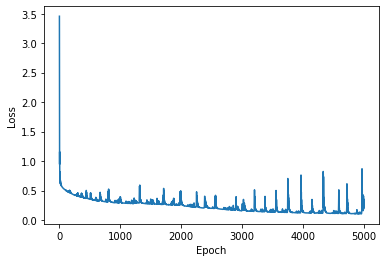

In [157]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [158]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

0
0
0
0
0
0
1
1
0
1
1
1
0
1
0
0
0
0
0
1
1
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
1
1
1
1
1
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0


In [159]:
y_test = y_test.cpu().detach().numpy()

In [160]:
cm=confusion_matrix(y_test,predictions)
cm

array([[85, 22],
       [24, 23]])

Text(69.0, 0.5, 'Predicted Values')

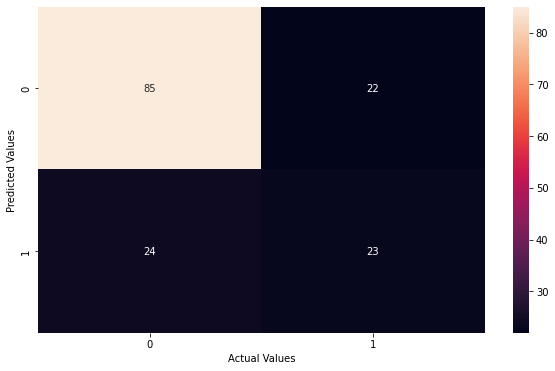

In [161]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [162]:
score=accuracy_score(y_test,predictions)
score

0.7012987012987013

In [163]:
#### Save the model
torch.save(model,'diabetes.pt')

In [164]:
#### Save And Load the model
model=torch.load('diabetes.pt')